In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
hr = pd.read_csv("C:\Hogwarts\machine_learning\Cases\human-resources-analytics\HR_comma_sep.csv")

In [3]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [11]:
X = hr.drop(['left',"Department","salary" ] , axis =1)
y = hr['left']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify = y,
                                                    random_state = 2022,
                                                    train_size = 0.7)

In [13]:
rf = RandomForestClassifier(random_state = 2022)

In [14]:
rf.fit(X_train , y_train)

RandomForestClassifier(random_state=2022)

In [24]:
kfold = StratifiedKFold(n_splits=5,
                       shuffle = True,
                       random_state =2022)

In [25]:
params = {"max_features":np.arange(3,15)}

In [26]:
gcv = GridSearchCV(rf,
                  param_grid = params,
                  cv = kfold,
                  verbose = 3,
                  scoring = "roc_auc")

In [27]:
y_pred = rf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.99


In [28]:
y_pred_prob = rf.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test, y_pred_prob))

0.9915429961233061


# Using Grid Search

In [33]:
kfold = StratifiedKFold(n_splits=5,
                       shuffle = True,
                       random_state =2022)

In [34]:
params = {"max_features":np.arange(3,15)}

In [35]:
gcv = GridSearchCV(rf,
                  param_grid = params,
                  cv = kfold,
                  verbose = 3,
                  scoring = "roc_auc")

In [36]:
gcv.fit(X,y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ....................max_features=3;, score=0.993 total time=   0.9s
[CV 2/5] END ....................max_features=3;, score=0.992 total time=   0.9s
[CV 3/5] END ....................max_features=3;, score=0.996 total time=   1.0s
[CV 4/5] END ....................max_features=3;, score=0.991 total time=   0.9s
[CV 5/5] END ....................max_features=3;, score=0.996 total time=   0.9s
[CV 1/5] END ....................max_features=4;, score=0.992 total time=   1.1s
[CV 2/5] END ....................max_features=4;, score=0.993 total time=   1.1s
[CV 3/5] END ....................max_features=4;, score=0.996 total time=   1.1s
[CV 4/5] END ....................max_features=4;, score=0.991 total time=   1.1s
[CV 5/5] END ....................max_features=4;, score=0.997 total time=   1.1s
[CV 1/5] END ....................max_features=5;, score=0.993 total time=   1.4s
[CV 2/5] END ....................max_features=5;

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2022, shuffle=True),
             estimator=RandomForestClassifier(random_state=2022),
             param_grid={'max_features': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             scoring='roc_auc', verbose=3)

In [37]:
print(gcv.best_params_)

{'max_features': 3}


In [40]:
print(gcv.best_score_)

0.9938014973381568


In [41]:
import matplotlib.pyplot as plt

In [42]:
best_model = gcv.best_estimator_

In [43]:
imps = best_model.feature_importances_

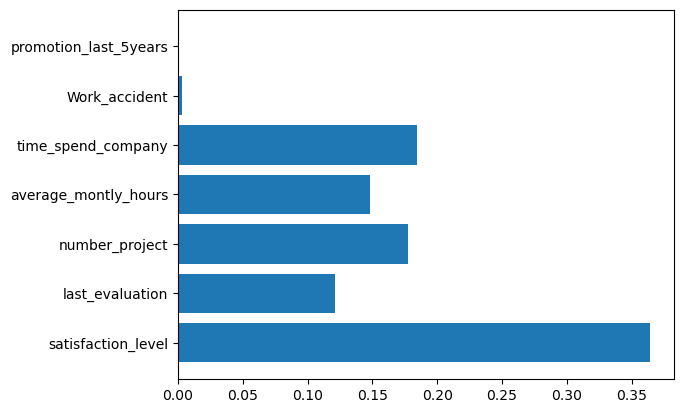

In [44]:
plt.barh(X.columns , imps)
plt.show()

In [45]:
i_sorted = np.argsort(-imps)

In [46]:
n_sorted = X.columns[i_sorted]
imp_sort = imps[i_sorted]

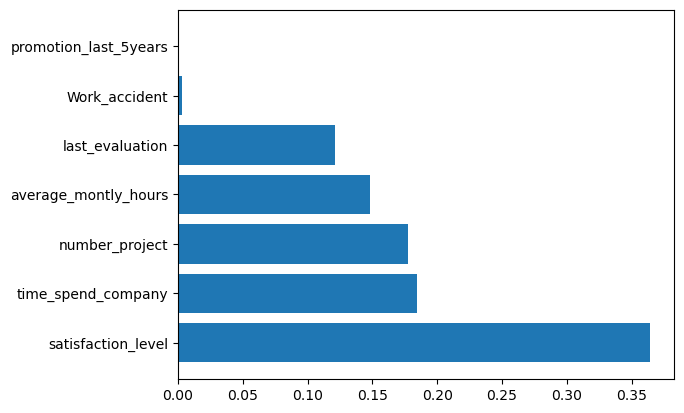

In [47]:
plt.barh(n_sorted , imp_sort)
plt.show()